In [2]:
!unzip -n "/content/drive/MyDrive/CICIDS 2017 dataset.zip"


Archive:  /content/drive/MyDrive/CICIDS 2017 dataset.zip
   creating: CICIDS 2017 dataset/
  inflating: CICIDS 2017 dataset/Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv  
  inflating: CICIDS 2017 dataset/Friday-WorkingHours-Afternoon-PortScan.pcap_ISCX.csv  
  inflating: CICIDS 2017 dataset/Friday-WorkingHours-Morning.pcap_ISCX.csv  
  inflating: CICIDS 2017 dataset/Monday-WorkingHours.pcap_ISCX.csv  
  inflating: CICIDS 2017 dataset/Thursday-WorkingHours-Afternoon-Infilteration.pcap_ISCX.csv  
  inflating: CICIDS 2017 dataset/Thursday-WorkingHours-Morning-WebAttacks.pcap_ISCX.csv  
  inflating: CICIDS 2017 dataset/Tuesday-WorkingHours.pcap_ISCX.csv  
  inflating: CICIDS 2017 dataset/Wednesday-workingHours.pcap_ISCX.csv  
Archive:  /content/drive/MyDrive/CICIDS 2017 dataset.zip


1.Setup and Data Loading

In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from imblearn.over_sampling import SMOTE # You might need to install 'imblearn'

# Define the file names for the CIC-IDS 2017 dataset
file_names = [
    'Monday-WorkingHours.pcap_ISCX.csv',
    'Tuesday-WorkingHours.pcap_ISCX.csv',
    'Wednesday-workingHours.pcap_ISCX.csv',
    'Thursday-WorkingHours-Morning-WebAttacks.pcap_ISCX.csv',
    'Thursday-WorkingHours-Afternoon-Infilteration.pcap_ISCX.csv',
    'Friday-WorkingHours-Morning.pcap_ISCX.csv',
    'Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv',
    'Friday-WorkingHours-Afternoon-PortScan.pcap_ISCX.csv'
]

data_dir = '/content/CICIDS 2017 dataset/'
all_data = []

print("1. Loading and Concatenating Data...")
for file in file_names:
    try:
        df = pd.read_csv(data_dir + file, encoding='latin1')
        all_data.append(df)
        print(f"  - Loaded {file} with shape: {df.shape}")
    except FileNotFoundError:
        print(f"  - ERROR: File not found: {file}")

# Combine all daily data into one DataFrame
df = pd.concat(all_data, ignore_index=True)
print(f"\nCombined DataFrame shape: {df.shape}")

1. Loading and Concatenating Data...
  - Loaded Monday-WorkingHours.pcap_ISCX.csv with shape: (529918, 79)
  - Loaded Tuesday-WorkingHours.pcap_ISCX.csv with shape: (445909, 79)
  - Loaded Wednesday-workingHours.pcap_ISCX.csv with shape: (692703, 79)
  - Loaded Thursday-WorkingHours-Morning-WebAttacks.pcap_ISCX.csv with shape: (170366, 79)
  - Loaded Thursday-WorkingHours-Afternoon-Infilteration.pcap_ISCX.csv with shape: (288602, 79)
  - Loaded Friday-WorkingHours-Morning.pcap_ISCX.csv with shape: (191033, 79)
  - Loaded Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv with shape: (225745, 79)
  - Loaded Friday-WorkingHours-Afternoon-PortScan.pcap_ISCX.csv with shape: (286467, 79)

Combined DataFrame shape: (2830743, 79)


2. Data Cleaning and Preparation


In [4]:
# --- 2.1 Clean Column Names ---
# Remove leading/trailing spaces and replace special characters
df.columns = df.columns.str.strip()
df.columns = df.columns.str.replace(' ', '_')
df.columns


Index(['Destination_Port', 'Flow_Duration', 'Total_Fwd_Packets',
       'Total_Backward_Packets', 'Total_Length_of_Fwd_Packets',
       'Total_Length_of_Bwd_Packets', 'Fwd_Packet_Length_Max',
       'Fwd_Packet_Length_Min', 'Fwd_Packet_Length_Mean',
       'Fwd_Packet_Length_Std', 'Bwd_Packet_Length_Max',
       'Bwd_Packet_Length_Min', 'Bwd_Packet_Length_Mean',
       'Bwd_Packet_Length_Std', 'Flow_Bytes/s', 'Flow_Packets/s',
       'Flow_IAT_Mean', 'Flow_IAT_Std', 'Flow_IAT_Max', 'Flow_IAT_Min',
       'Fwd_IAT_Total', 'Fwd_IAT_Mean', 'Fwd_IAT_Std', 'Fwd_IAT_Max',
       'Fwd_IAT_Min', 'Bwd_IAT_Total', 'Bwd_IAT_Mean', 'Bwd_IAT_Std',
       'Bwd_IAT_Max', 'Bwd_IAT_Min', 'Fwd_PSH_Flags', 'Bwd_PSH_Flags',
       'Fwd_URG_Flags', 'Bwd_URG_Flags', 'Fwd_Header_Length',
       'Bwd_Header_Length', 'Fwd_Packets/s', 'Bwd_Packets/s',
       'Min_Packet_Length', 'Max_Packet_Length', 'Packet_Length_Mean',
       'Packet_Length_Std', 'Packet_Length_Variance', 'FIN_Flag_Count',
       'SYN_Flag_Co

In [5]:
pd.options.display.max_rows = 80
print('Over view of columns: ')
df.describe().transpose()

Over view of columns: 


,count,mean,std,min,25%,50%,75%,max
Destination_Port,2830743.0,8.071483e+03,1.828363e+04,0.000000e+00,53.000000,80.000000,4.430000e+02,6.553500e+04
Flow_Duration,2830743.0,1.478566e+07,3.365374e+07,-1.300000e+01,155.000000,31316.000000,3.204828e+06,1.200000e+08
Total_Fwd_Packets,2830743.0,9.361160e+00,7.496728e+02,1.000000e+00,2.000000,2.000000,5.000000e+00,2.197590e+05
Total_Backward_Packets,2830743.0,1.039377e+01,9.973883e+02,0.000000e+00,1.000000,2.000000,4.000000e+00,2.919220e+05
Total_Length_of_Fwd_Packets,2830743.0,5.493024e+02,9.993589e+03,0.000000e+00,12.000000,62.000000,1.870000e+02,1.290000e+07
Total_Length_of_Bwd_Packets,2830743.0,1.616264e+04,2.263088e+06,0.000000e+00,0.000000,123.000000,4.820000e+02,6.554530e+08
Fwd_Packet_Length_Max,2830743.0,2.075999e+02,7.171848e+02,0.000000e+00,6.000000,37.000000,8.100000e+01,2.482000e+04
Fwd_Packet_Length_Min,2830743.0,1.871366e+01,6.033935e+01,0.000000e+00,0.000000,2.000000,3.600000e+01,2.325000e+03
Fwd_Packet_Length_Mean,2830743.0,5.820194e+01,1.860912e+02,0.000000e+00,6.000000,34.000000,5.000000e+01,5.940857e+03
Fwd_Packet_Length_Std,2830743.0,6.891013e+01,2.811871e+02,0.000000e+00,0.000000,0.000000,2.616295e+01,7.125597e+03


In [6]:
df.replace([np.inf, -np.inf], np.nan, inplace=True)

In [7]:
df.isna().sum()

,0
Destination_Port,0
Flow_Duration,0
Total_Fwd_Packets,0
Total_Backward_Packets,0
Total_Length_of_Fwd_Packets,0
Total_Length_of_Bwd_Packets,0
Fwd_Packet_Length_Max,0
Fwd_Packet_Length_Min,0
Fwd_Packet_Length_Mean,0
Fwd_Packet_Length_Std,0


In [8]:

# --- 2.2 Handle Missing (NaN) and Infinite (Inf) Values ---

# Replace infinite values with a large number or NaN, then drop NaN
df.replace([np.inf, -np.inf], np.nan, inplace=True)
missing = df.isna().sum()

med_flow_bytes = df['Flow_Bytes/s'].median()
med_flow_packets = df['Flow_Packets/s'].median()

# Filling missing values with median
df['Flow_Bytes/s'].fillna(med_flow_bytes, inplace = True)
df['Flow_Packets/s'].fillna(med_flow_packets, inplace = True)

/tmp/ipython-input-802723642.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Flow_Bytes/s'].fillna(med_flow_bytes, inplace = True)
/tmp/ipython-input-802723642.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)

In [9]:
# --- 2.3 Handle Duplicate Rows ---
# Duplicates can severely bias the model
df.drop_duplicates(inplace=True)

print(f"\nCleaned DataFrame shape: {df.shape}")


Cleaned DataFrame shape: (2522362, 79)


In [10]:
df.sample(5)

,Destination_Port,Flow_Duration,Total_Fwd_Packets,Total_Backward_Packets,Total_Length_of_Fwd_Packets,Total_Length_of_Bwd_Packets,Fwd_Packet_Length_Max,Fwd_Packet_Length_Min,Fwd_Packet_Length_Mean,Fwd_Packet_Length_Std,...,min_seg_size_forward,Active_Mean,Active_Std,Active_Max,Active_Min,Idle_Mean,Idle_Std,Idle_Max,Idle_Min,Label
2028422,4,83,2,2,4,12,2,2,2.0,0.0,...,24,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2505403,62931,8110974,1,5,6,30,6,6,6.0,0.0,...,20,24242.0,0.0,24242,24242,8086732.0,0.0,8086732,8086732,BENIGN
1734193,53,51120,2,2,64,120,32,32,32.0,0.0,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
20180,123,66095685,2,2,96,96,48,48,48.0,0.0,...,20,94844.0,0.0,94844,94844,65903682.0,0.0,65903682,65903682,BENIGN
2456053,53,374,2,2,64,258,32,32,32.0,0.0,...,40,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN


In [11]:
df['Label'].unique()


array(['BENIGN', 'FTP-Patator', 'SSH-Patator', 'DoS slowloris',
       'DoS Slowhttptest', 'DoS Hulk', 'DoS GoldenEye', 'Heartbleed',
       'Web Attack ï¿½ Brute Force', 'Web Attack ï¿½ XSS',
       'Web Attack ï¿½ Sql Injection', 'Infiltration', 'Bot', 'DDoS',
       'PortScan'], dtype=object)

In [12]:
# Creating a dictionary that maps each label to its attack type
attack_map = {
    'BENIGN': 'BENIGN',
    'DDoS': 'DDoS',
    'DoS Hulk': 'DoS',
    'DoS GoldenEye': 'DoS',
    'DoS slowloris': 'DoS',
    'DoS Slowhttptest': 'DoS',
    'PortScan': 'Port Scan',
    'FTP-Patator': 'Brute Force',
    'SSH-Patator': 'Brute Force',
    'Bot': 'Bot',
    'Web Attack ï¿½ Brute Force': 'Web Attack',
    'Web Attack ï¿½ XSS': 'Web Attack',
    'Web Attack ï¿½ Sql Injection': 'Web Attack',
    'Infiltration': 'Infiltration',
    'Heartbleed': 'Heartbleed'
}

# Creating a new column 'Attack new*' in the DataFrame based on the attack_map dictionary
df['Attack new'] = df['Label'].map(attack_map)

In [13]:
df.drop('Label', axis = 1, inplace = True)


3. Feature and Label Separation

In [14]:
# --- 3.1 Separate Features (X) and Target (y) ---
X = df.drop('Attack new', axis=1)
y = df['Attack new']

# --- 3.2 Drop Metadata Features (Optional but Recommended) ---
# These features act as "shortcuts" and prevent the model from learning general patterns.
metadata_cols = ['Flow_ID', 'Source_IP', 'Source_Port', 'Destination_IP', 'Timestamp']
X = X.drop(columns=metadata_cols, errors='ignore')

# --- 3.3 Clean up the Label Column ---
# Ensure all 'BENIGN' variations are consistent
y = y.str.strip()
y = y.replace('BENIGN', 'Benign')

print("\nAttack Class Distribution (before encoding):")
print(y.value_counts())


Attack Class Distribution (before encoding):
Attack new
Benign          2096484
DoS              193748
DDoS             128016
Port Scan         90819
Brute Force        9152
Web Attack         2143
Bot                1953
Infiltration         36
Heartbleed           11
Name: count, dtype: int64


4. Label Encoding (Target Variable $y$)

In [15]:
# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the target labels
y_encoded = label_encoder.fit_transform(y)

# Store the mapping for later interpretation
label_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print("\nLabel Mapping (Attack Type -> Integer):")
print(label_mapping)


Label Mapping (Attack Type -> Integer):
{'Benign': np.int64(0), 'Bot': np.int64(1), 'Brute Force': np.int64(2), 'DDoS': np.int64(3), 'DoS': np.int64(4), 'Heartbleed': np.int64(5), 'Infiltration': np.int64(6), 'Port Scan': np.int64(7), 'Web Attack': np.int64(8)}


In [17]:
import joblib
# Save the encoder
joblib.dump(label_encoder, 'label_encoder.pkl')
print("label_encoder.pkl successfully created!")

label_encoder.pkl successfully created!


5. Feature Scaling (Input Variables $X$)

In [16]:
from sklearn.preprocessing import RobustScaler

# MinMaxScaler ki jagah RobustScaler use karein
scaler = RobustScaler()

# Fit the scaler ONLY on the training data (we'll split first for best practice)
# We will do a simple train/test split before scaling to ensure data leakage doesn't occur.
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.3, random_state=42, stratify=y_encoded
)

print(f"\nTraining set shape (X_train): {X_train.shape}")
print(f"Test set shape (X_test): {X_test.shape}")

# Fit scaler on training data and transform both sets
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


Training set shape (X_train): (1765653, 78)
Test set shape (X_test): (756709, 78)


In [17]:
import joblib
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']

Cell 1: Setup and Feature Selection (The $\text{Class Weight}$ Calculation)

In [17]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.utils import class_weight
from tensorflow.keras.utils import to_categorical # Used later for LSTM

print("--- 1. Calculate Class Weights and Feature Selection ---")

# --- 1.1 Calculate Class Weights for Imbalance Handling (Key Step!) ---
# These weights penalize the misclassification of small attack classes more heavily.
weights = class_weight.compute_class_weight(
    'balanced',
    classes=np.unique(y_train),
    y=y_train
)
class_weights_dict = dict(zip(np.unique(y_train), weights))
print("Class Weights Calculated (e.g., higher weight for rare attacks):")
for label, weight in sorted(class_weights_dict.items()):
    # Convert label back to original name for clarity (assuming label_mapping is available)
    try:
        original_name = next(key for key, value in label_mapping.items() if value == label)
    except NameError:
        original_name = f"Class {label}"
    print(f"  - {original_name}: {weight:.2f}")

--- 1. Calculate Class Weights and Feature Selection ---
Class Weights Calculated (e.g., higher weight for rare attacks):
  - Benign: 0.13
  - Bot: 143.51
  - Brute Force: 30.62
  - DDoS: 2.19
  - DoS: 1.45
  - Heartbleed: 24522.96
  - Infiltration: 7847.35
  - Port Scan: 3.09
  - Web Attack: 130.79


In [19]:
# --- 1.2 Feature Selection via Random Forest Importance ---

# The training data needs to be converted back to a DataFrame to access column names
# The scaled data X_train_scaled is a NumPy array
X_train_df_full = pd.DataFrame(X_train_scaled, columns=X_train.columns)

# Train RF model using class weights on the original scaled data
rf_selector = RandomForestClassifier(
    n_estimators=50,
    random_state=42,
    n_jobs=-1,
    class_weight=class_weights_dict # Imbalance handled here
)
rf_selector.fit(X_train_df_full, y_train)

# Extract and select the top 30 features
importances = rf_selector.feature_importances_
feature_importances = pd.Series(importances, index=X_train.columns)
sorted_importances = feature_importances.sort_values(ascending=False)

top_n = 30
top_features = sorted_importances.head(top_n).index.tolist()

print(f"\nTop {top_n} Features Selected (Used for all subsequent models):")
print(top_features)




Top 30 Features Selected (Used for all subsequent models):
['Destination_Port', 'Max_Packet_Length', 'Init_Win_bytes_backward', 'Total_Length_of_Bwd_Packets', 'Subflow_Fwd_Bytes', 'Packet_Length_Mean', 'Bwd_Packet_Length_Max', 'Total_Length_of_Fwd_Packets', 'Bwd_Header_Length', 'Fwd_Packet_Length_Mean', 'Average_Packet_Size', 'Avg_Fwd_Segment_Size', 'Avg_Bwd_Segment_Size', 'Fwd_Packet_Length_Max', 'Subflow_Bwd_Bytes', 'Flow_Bytes/s', 'Fwd_Header_Length.1', 'Bwd_Packet_Length_Mean', 'Total_Backward_Packets', 'Packet_Length_Std', 'Init_Win_bytes_forward', 'Flow_IAT_Max', 'Fwd_Packet_Length_Std', 'Fwd_IAT_Max', 'Fwd_Header_Length', 'Flow_Duration', 'Packet_Length_Variance', 'Fwd_IAT_Total', 'Total_Fwd_Packets', 'Bwd_Packet_Length_Std']


In [18]:
top_features = ['Destination_Port', 'Max_Packet_Length', 'Init_Win_bytes_backward', 'Total_Length_of_Bwd_Packets', 'Subflow_Fwd_Bytes', 'Packet_Length_Mean', 'Bwd_Packet_Length_Max', 'Total_Length_of_Fwd_Packets', 'Bwd_Header_Length', 'Fwd_Packet_Length_Mean', 'Average_Packet_Size', 'Avg_Fwd_Segment_Size', 'Avg_Bwd_Segment_Size', 'Fwd_Packet_Length_Max', 'Subflow_Bwd_Bytes', 'Flow_Bytes/s', 'Fwd_Header_Length.1', 'Bwd_Packet_Length_Mean', 'Total_Backward_Packets', 'Packet_Length_Std', 'Init_Win_bytes_forward', 'Flow_IAT_Max', 'Fwd_Packet_Length_Std', 'Fwd_IAT_Max', 'Fwd_Header_Length', 'Flow_Duration', 'Packet_Length_Variance', 'Fwd_IAT_Total', 'Total_Fwd_Packets', 'Bwd_Packet_Length_Std']


In [19]:
# --- 1.3 Create the final feature-reduced datasets ---
# Create DataFrames for easy subsetting of the test data (which is a NumPy array)
X_train_df_full = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_df_full = pd.DataFrame(X_test_scaled, columns=X_test.columns)

X_train_reduced = X_train_df_full[top_features].values
X_test_reduced = X_test_df_full[top_features].values

print(f"Reduced Training shape: {X_train_reduced.shape}")
print(f"Reduced Test shape: {X_test_reduced.shape}")


Reduced Training shape: (1765653, 30)
Reduced Test shape: (756709, 30)


--- Feature Selection Analysis ---

✅ Top 30 Selected Features:
1. Destination_Port
2. Max_Packet_Length
3. Init_Win_bytes_backward
4. Total_Length_of_Bwd_Packets
5. Subflow_Fwd_Bytes
6. Packet_Length_Mean
7. Bwd_Packet_Length_Max
8. Total_Length_of_Fwd_Packets
9. Bwd_Header_Length
10. Fwd_Packet_Length_Mean
11. Average_Packet_Size
12. Avg_Fwd_Segment_Size
13. Avg_Bwd_Segment_Size
14. Fwd_Packet_Length_Max
15. Subflow_Bwd_Bytes
16. Flow_Bytes/s
17. Fwd_Header_Length.1
18. Bwd_Packet_Length_Mean
19. Total_Backward_Packets
20. Packet_Length_Std
21. Init_Win_bytes_forward
22. Flow_IAT_Max
23. Fwd_Packet_Length_Std
24. Fwd_IAT_Max
25. Fwd_Header_Length
26. Flow_Duration
27. Packet_Length_Variance
28. Fwd_IAT_Total
29. Total_Fwd_Packets
30. Bwd_Packet_Length_Std


/tmp/ipython-input-3963739868.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


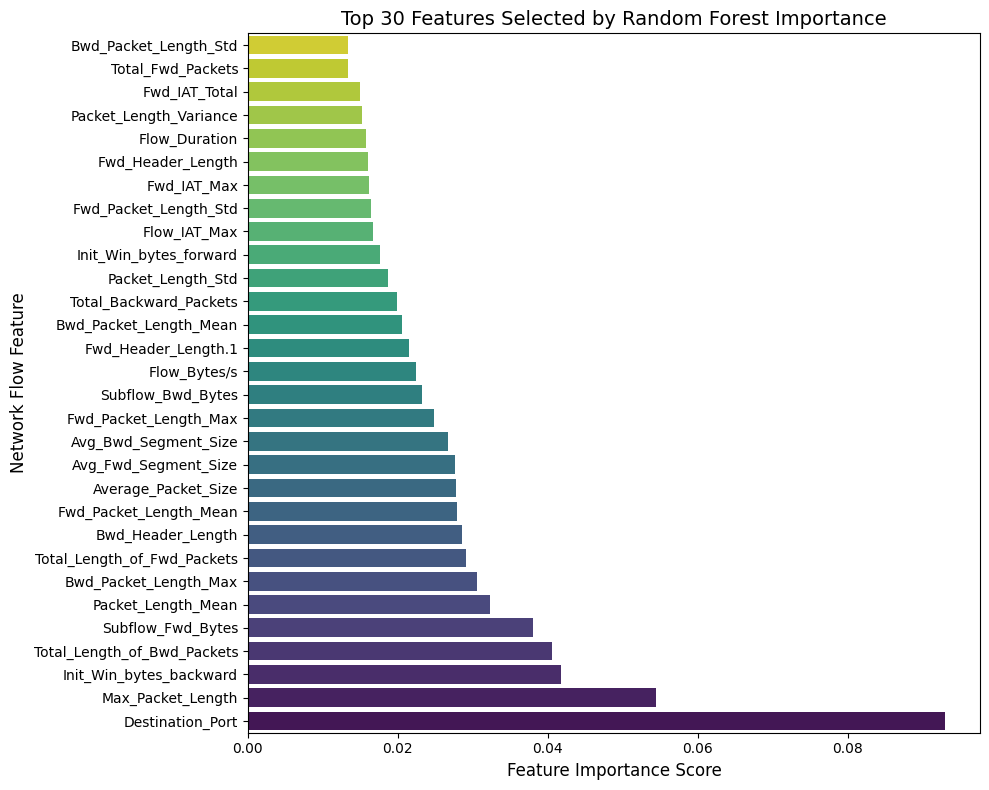

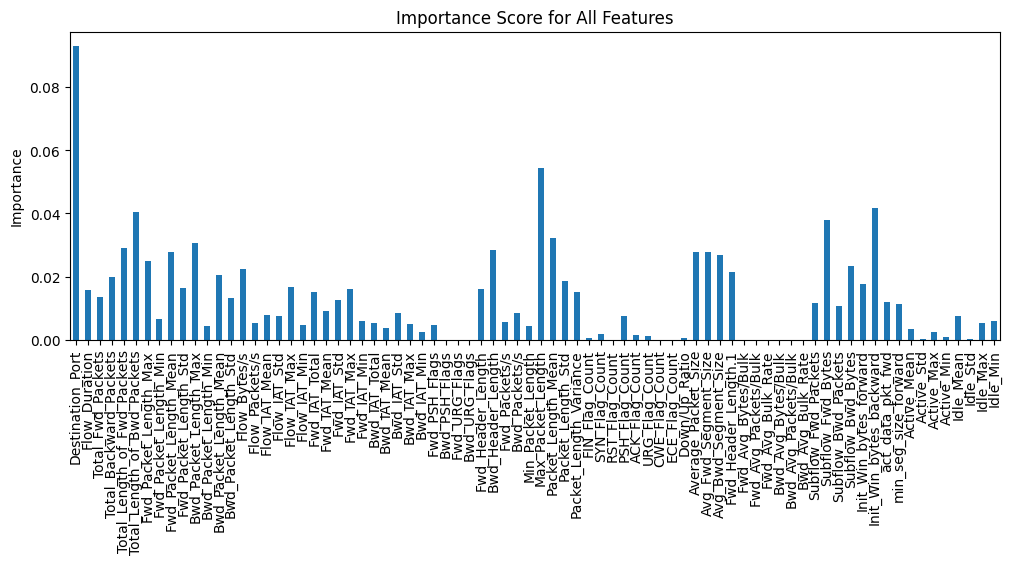

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

print("--- Feature Selection Analysis ---")

# 1. Print the Top Selected Features
top_features_list = sorted_importances.head(top_n).index.tolist()
print(f"\n✅ Top {top_n} Selected Features:")
for i, feature in enumerate(top_features_list):
    print(f"{i+1}. {feature}")

# 2. Visualize the Top Feature Importances

plt.figure(figsize=(10, 8))
# Use the sorted importances to plot the top N features
sns.barplot(
    x=sorted_importances.head(top_n).values,
    y=sorted_importances.head(top_n).index,
    palette='viridis'
)
plt.title(f'Top {top_n} Features Selected by Random Forest Importance', fontsize=14)
plt.xlabel('Feature Importance Score', fontsize=12)
plt.ylabel('Network Flow Feature', fontsize=12)
plt.gca().invert_yaxis() # Display the most important feature at the top
plt.tight_layout()
plt.show()


# 3. Analyze the Full Feature Distribution

# Optional: Visualize the importance distribution for ALL features to see the drop-off
plt.figure(figsize=(12, 4))
feature_importances.plot.bar(figsize=(12, 4))
plt.title('Importance Score for All Features')
plt.ylabel('Importance')
plt.show()

In [22]:
#3. Save the list of 30 selected features
joblib.dump(top_features, 'selected_features.pkl')

['selected_features.pkl']

In [ ]:
import pandas as pd

print("2. Saving Reduced Datasets...")

# Convert reduced numpy arrays back to DataFrames for saving with potential column names
# We'll use a generic naming scheme for now, as original column names are not directly available after .values
# from feature selection. If needed, the top_features list can be used for column names.

X_train_reduced_df = pd.DataFrame(X_train_reduced, columns=top_features)
X_test_reduced_df = pd.DataFrame(X_test_reduced, columns=top_features)

# Save the reduced training data
train_output_filename = 'X_train_reduced.csv'
X_train_reduced_df.to_csv(train_output_filename, index=False)
print(f"Reduced training data saved to {train_output_filename} with shape: {X_train_reduced_df.shape}")

# Save the reduced test data
test_output_filename = 'X_test_reduced.csv'
X_test_reduced_df.to_csv(test_output_filename, index=False)
print(f"Reduced test data saved to {test_output_filename} with shape: {X_test_reduced_df.shape}")

2. Saving Reduced Datasets...
Reduced training data saved to X_train_reduced.csv with shape: (1765653, 30)
Reduced test data saved to X_test_reduced.csv with shape: (756709, 30)


In [20]:
import pandas as pd

# 1. Reduced features aur y_train ko ek temporary DataFrame mein dalna
temp_df = pd.DataFrame(X_train_reduced, columns=top_features)
temp_df['label'] = y_train

# 2. Total duplicates count karna
total_duplicates = temp_df.duplicated().sum()
print(f"Total duplicate rows in reduced data: {total_duplicates}")

# 3. Conflicting labels check karna (Same features but different labels)
# Hum sirf features ke basis par duplicates dhoondte hain
feature_duplicates = temp_df.duplicated(subset=top_features, keep=False)
conflicts = temp_df[feature_duplicates].groupby(top_features)['label'].nunique()
conflicting_rows = conflicts[conflicts > 1].count()

print(f"Rows with same features but DIFFERENT labels: {conflicting_rows}")

# 4. Agar aap duplicates remove karna chahti hain (Fix):
if total_duplicates > 0:
    print("\nRemoving duplicates to clean the training data...")
    temp_df_cleaned = temp_df.drop_duplicates()

    # Naya X_train_reduced aur y_train banana
    X_train_reduced_cleaned = temp_df_cleaned.drop('label', axis=1).values
    y_train_cleaned = temp_df_cleaned['label'].values

    print(f"New Training Shape: {X_train_reduced_cleaned.shape}")
else:
    print("\nNo duplicates found, data is clean.")

Total duplicate rows in reduced data: 1676
Rows with same features but DIFFERENT labels: 360

Removing duplicates to clean the training data...
New Training Shape: (1763977, 30)


retraining

In [21]:
import gc
import joblib
import numpy as np
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.metrics import classification_report

# 1. Purane bade variables delete karke RAM khali karein
# (Jo variables ab kaam ke nahi hain unhe hata dein)
try:
    del X_train_df_full, X_test_df_full, temp_df, df
except NameError:
    pass
gc.collect() # Garbage Collector ko force karein RAM saaf karne ke liye

print("🧹 RAM Cleared. Starting Training...")

🧹 RAM Cleared. Starting Training...


In [22]:


# 2. Random Forest (Memory Optimized)
# n_jobs=2 rakha hai (taaki saare cores RAM na kha jayein)
# max_samples=0.5 (ye har tree ko sirf 50% data dikhayega, accuracy wahi rahegi par RAM bachegi)
rf_final = RandomForestClassifier(
    n_estimators=50, # 100 se kam karke 50 kiya (experiment ke liye kaafi hai)
    max_depth=10,
    max_samples=0.5,
    class_weight=class_weights_dict,
    random_state=42,
    n_jobs=2
)

# 3. XGBoost (Memory Optimized)
# tree_method='hist' use karne se bade data par RAM kam lagti hai
xgb_final = xgb.XGBClassifier(
    objective='multi:softmax',
    n_estimators=50,
    max_depth=4,
    learning_rate=0.1,
    tree_method='hist', # 🚀 Faster and Memory Efficient
    random_state=42,
    n_jobs=2
)

# 4. Training
print("Training Random Forest...")
rf_final.fit(X_train_reduced_cleaned, y_train_cleaned)

print("Training XGBoost...")
sample_weights_final = np.vectorize(class_weights_dict.get)(y_train_cleaned)
xgb_final.fit(X_train_reduced_cleaned, y_train_cleaned, sample_weight=sample_weights_final)

# 5. Results
print("\n✅ Training Complete without Crash!")
print("\n--- RF FINAL RESULTS ---")
print(classification_report(y_test, rf_final.predict(X_test_reduced)))

print("\n--- XGB FINAL RESULTS ---")
print(classification_report(y_test, xgb_final.predict(X_test_reduced)))

Training Random Forest...
Training XGBoost...

✅ Training Complete without Crash!

--- RF FINAL RESULTS ---
              precision    recall  f1-score   support

           0       1.00      0.97      0.99    628945
           1       0.04      1.00      0.08       586
           2       0.96      1.00      0.98      2746
           3       1.00      1.00      1.00     38405
           4       0.97      0.99      0.98     58124
           5       1.00      1.00      1.00         3
           6       1.00      0.91      0.95        11
           7       0.99      1.00      0.99     27246
           8       0.18      0.99      0.30       643

    accuracy                           0.98    756709
   macro avg       0.79      0.98      0.81    756709
weighted avg       0.99      0.98      0.98    756709


--- XGB FINAL RESULTS ---
              precision    recall  f1-score   support

           0       1.00      0.97      0.98    628945
           1       0.09      1.00      0.16       5

Generating Confusion Matrix for Random Forest...


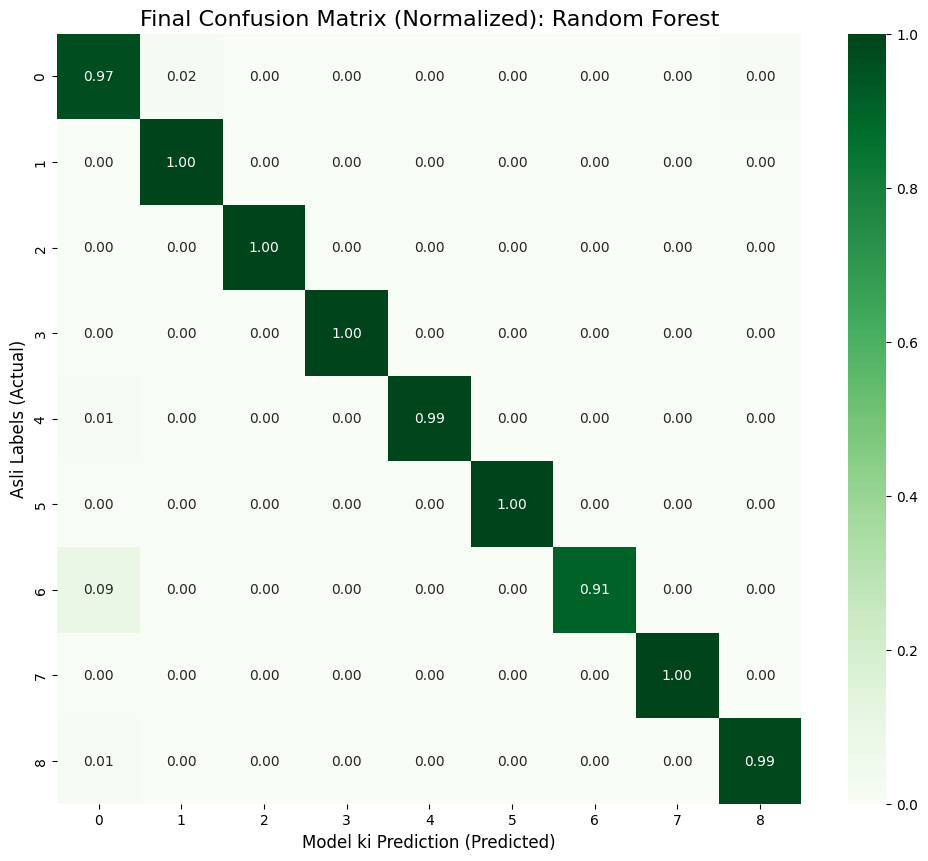

Generating Confusion Matrix for XGBoost...


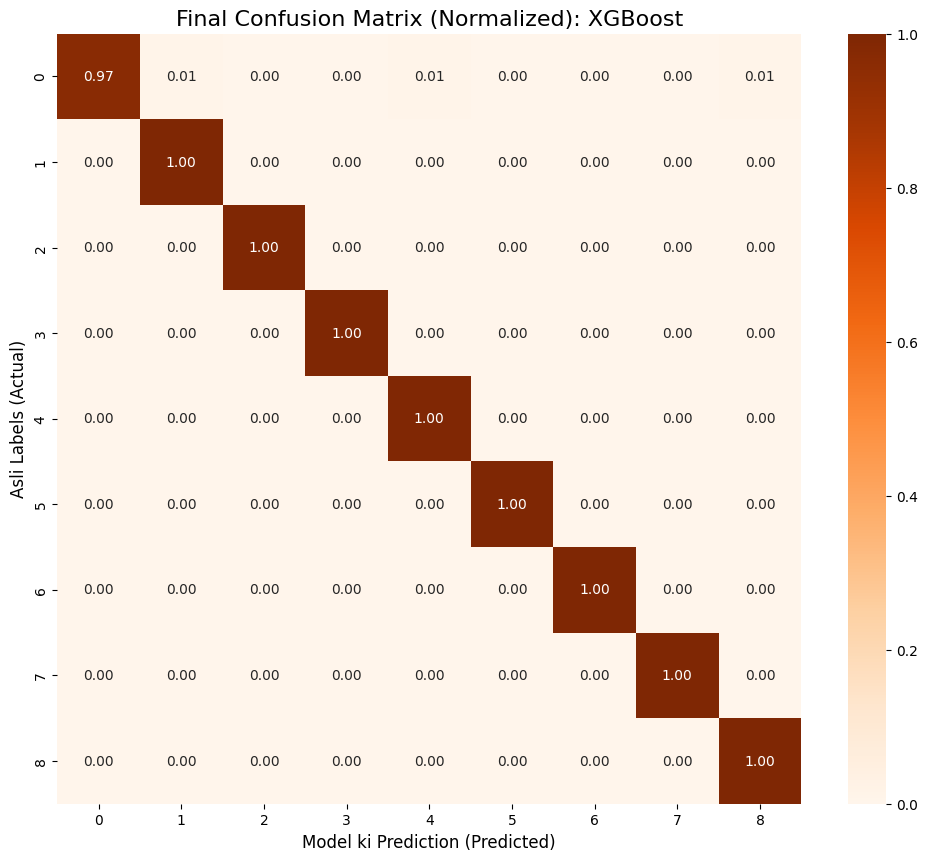

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import numpy as np

def plot_final_confusion_matrix(y_true, y_pred, model_name, cmap='Blues'):
    # Confusion Matrix calculate karna
    cm = confusion_matrix(y_true, y_pred)

    # Isse percentage mein convert karna (taaki imbalances saaf dikhein)
    cm_perc = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.figure(figsize=(12, 10))

    # Label names (agar aapke paas original names hain toh wo use karein)
    # yahan hum generic 0-8 labels use kar rahe hain
    labels = sorted(np.unique(y_true))

    sns.heatmap(cm_perc, annot=True, fmt='.2f', cmap=cmap,
                xticklabels=labels, yticklabels=labels)

    plt.title(f'Final Confusion Matrix (Normalized): {model_name}', fontsize=16)
    plt.ylabel('Asli Labels (Actual)', fontsize=12)
    plt.xlabel('Model ki Prediction (Predicted)', fontsize=12)
    plt.show()

# 1. Random Forest ka Confusion Matrix (Winner Model)
print("Generating Confusion Matrix for Random Forest...")
plot_final_confusion_matrix(y_test, rf_final.predict(X_test_reduced), "Random Forest", cmap='Greens')

# 2. XGBoost ka Confusion Matrix
print("Generating Confusion Matrix for XGBoost...")
plot_final_confusion_matrix(y_test, xgb_final.predict(X_test_reduced), "XGBoost", cmap='Oranges')

Model Training: LSTM Network

/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Training LSTM...
Epoch 1/8
13795/13795 ━━━━━━━━━━━━━━━━━━━━ 84s 6ms/step - accuracy: 0.7648 - loss: 1.2371
Epoch 2/8
13795/13795 ━━━━━━━━━━━━━━━━━━━━ 78s 6ms/step - accuracy: 0.8611 - loss: 0.4553
Epoch 3/8
13795/13795 ━━━━━━━━━━━━━━━━━━━━ 77s 6ms/step - accuracy: 0.8309 - loss: 0.5252
Epoch 4/8
13795/13795 ━━━━━━━━━━━━━━━━━━━━ 77s 6ms/step - accuracy: 0.8810 - loss: 0.5474
Epoch 5/8
13795/13795 ━━━━━━━━━━━━━━━━━━━━ 77s 6ms/step - accuracy: 0.9018 - loss: 0.3919
Epoch 6/8
13795/13795 ━━━━━━━━━━━━━━━━━━━━ 81s 5ms/step - accuracy: 0.8801 - loss: 0.7679
Epoch 7/8
13795/13795 ━━━━━━━━━━━━━━━━━━━━ 77s 6ms/step - accuracy: 0.8546 - loss: 1.6650
Epoch 8/8
13795/13795 ━━━━━━━━━━━━━━━━━━━━ 76s 5ms/step - accuracy: 0.8861 - loss: 1.8369
23648/23648 ━━━━━━━━━━━━━━━━━━━━ 41s 2ms/step

--- LSTM Evaluation ---
              precision    recall  f1-score   support

           0       1.00      0.94      0.97    628945
           1       0.04      0.99      0.07       586
           2       0.80      

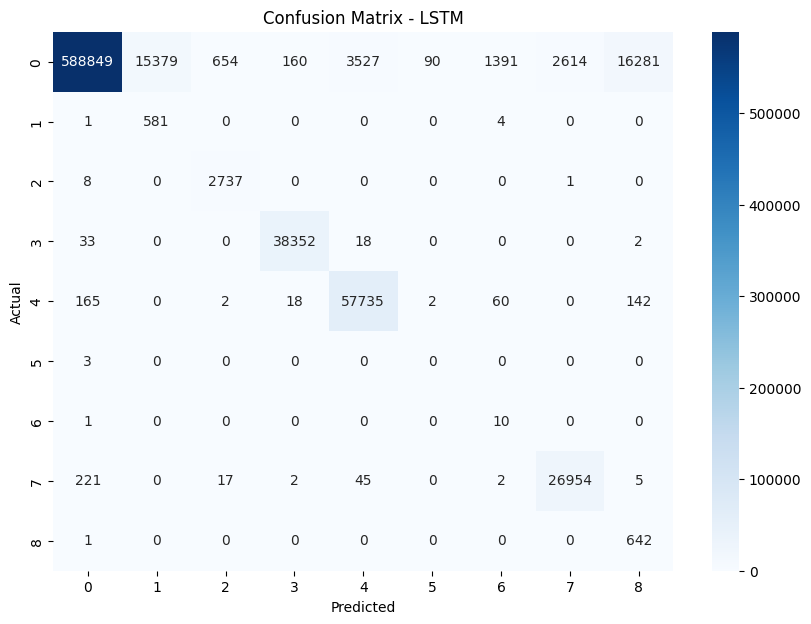

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout

# Reshape input to (samples, time_steps, features) -> (N, 1, 30)
X_train_lstm = X_train_reduced.reshape((X_train_reduced.shape[0], 1, X_train_reduced.shape[1]))
X_test_lstm = X_test_reduced.reshape((X_test_reduced.shape[0], 1, X_test_reduced.shape[1]))

num_classes = len(np.unique(y_train))

lstm_model = Sequential([
    LSTM(64, input_shape=(1, 30), return_sequences=False),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dense(num_classes, activation='softmax')
])

lstm_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

print("Training LSTM...")
lstm_model.fit(X_train_lstm, y_train, epochs=8, batch_size=128, class_weight=class_weights_dict, verbose=1)

# Prediction & Evaluation
lstm_probs = lstm_model.predict(X_test_lstm)
lstm_preds = np.argmax(lstm_probs, axis=1)
evaluate_model("LSTM", y_test, lstm_preds)

--- Final Model Comparison Table ---
           Model  Accuracy  Macro F1-Score  Macro Recall
0  Random Forest      0.98            0.81          0.98
1        XGBoost      0.97            0.65          0.99
2           LSTM      0.93            0.54          0.96


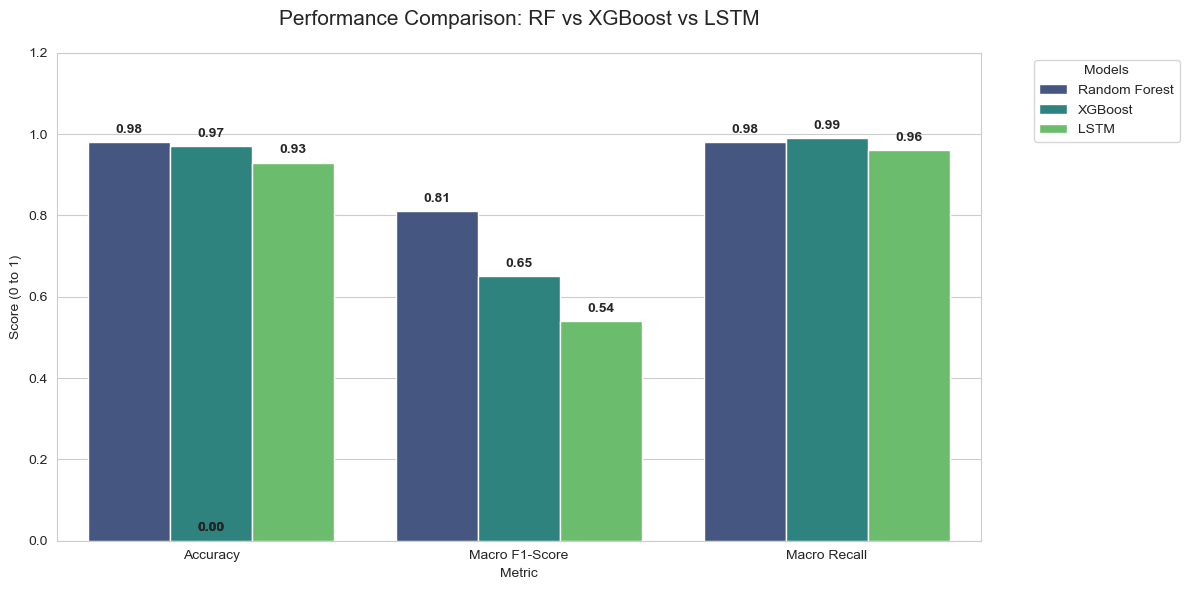

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Data ko organize karna (Aapke outputs se li gayi values)
data = {
    'Model': ['Random Forest', 'XGBoost', 'LSTM'],
    'Accuracy': [0.98, 0.97, 0.93],
    'Macro F1-Score': [0.81,0.65, 0.54],
    'Macro Recall': [0.98, 0.99, 0.96]
}

# DataFrame banana
df_results = pd.DataFrame(data)

# 2. Comparison Table print karna
print("--- Final Model Comparison Table ---")
print(df_results.sort_values(by='Macro F1-Score', ascending=False))

# 3. Visualization (Bar Chart)
# Data ko plotting ke liye rearrange (Melt) karna
df_plot = df_results.melt(id_vars='Model', var_name='Metric', value_name='Score')

plt.figure(figsize=(12, 6))
sns.set_style("whitegrid")
ax = sns.barplot(data=df_plot, x='Metric', y='Score', hue='Model', palette='viridis')

# Bars ke upar numbers likhna
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center',
                xytext = (0, 9),
                textcoords = 'offset points',
                fontsize=10, fontweight='bold')

plt.title('Performance Comparison: RF vs XGBoost vs LSTM', fontsize=15, pad=20)
plt.ylim(0, 1.2) # Thoda space upar scores ke liye
plt.ylabel('Score (0 to 1)')
plt.legend(title='Models', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [4]:
import joblib

rf_model = joblib.load(open(r'C:\Users\hp\OneDrive\Desktop\IDS\new_IDS\model\random_forest_model.pkl', 'rb'))
print("Random Forest model loaded successfully!")

Random Forest model loaded successfully!


In [27]:
import joblib

xgb_model = joblib.load('best_xgboost_model.pkl')
print("xgboost model loaded successfully!")

xgboost model loaded successfully!


In [28]:
import joblib

# 1. Random Forest Model ko save karein (Jo aapka Best Model hai)
joblib.dump(rf_final, 'random_forest_model.pkl')
print("✅ Random Forest Model Saved Successfully!")

# 2. XGBoost Model ko save karein
joblib.dump(xgb_final, 'xgboost_model.pkl')
print("✅ XGBoost Model Saved Successfully!")




✅ Random Forest Model Saved Successfully!
✅ XGBoost Model Saved Successfully!


In [25]:
import pandas as pd
import numpy as np
import plotly.express as px

# 1. Test set se 'Normal' aur 'Attack' samples dhoondna
# Hum y_test ka use karke real indices nikalenge
normal_indices = np.where(y_test == 0)[0][:20] # Pehle 10 Normal
attack_indices = np.where(y_test != 0)[0][:15] # Pehle 10 Attacks (Class 1-8)

# 2. In indices ke base par data uthana
# X_test_reduced aapka scaled aur selected features wala data hai
all_indices = np.concatenate([normal_indices, attack_indices])
X_sample = X_test_reduced[all_indices]
y_sample_true = y_test[all_indices]

# 3. Model se prediction karwana
sample_preds = xgb_final.predict(X_sample)
sample_probs = xgb_final.predict_proba(X_sample)

# 4. Visualization ke liye DataFrame banana
df_viz = pd.DataFrame(X_sample, columns=top_features)
df_viz['Actual_Class'] = y_sample_true
df_viz['Predicted_Class'] = sample_preds
df_viz['Confidence'] = [max(p) for p in sample_probs]
df_viz['Result'] = df_viz['Predicted_Class'].map(lambda x: 'Normal Traffic' if x == 0 else '⚠️ ATTACK DETECTED')

print(f"Total samples extracted: {len(df_viz)}")
print(df_viz[['Actual_Class', 'Predicted_Class', 'Result']].head(35))

# 5. 3D Plotly Graph (With Colab Fix)
f1, f2, f3 = top_features[0], top_features[1], top_features[2]

fig = px.scatter_3d(
    df_viz, x=f1, y=f2, z=f3,
    color='Result',
    symbol='Result',
    size='Confidence',
    hover_data=['Actual_Class', 'Predicted_Class'],
    title="Real-Time Detection Simulation (Using Test Data Samples)",
    color_discrete_map={'Normal Traffic': 'green', '⚠️ ATTACK DETECTED': 'red'}
)

# Colab mein graph na dikhne par ye line help karegi
fig.show(renderer="colab")

Total samples extracted: 35
    Actual_Class  Predicted_Class              Result
0              0                0      Normal Traffic
1              0                0      Normal Traffic
2              0                0      Normal Traffic
3              0                0      Normal Traffic
4              0                0      Normal Traffic
5              0                0      Normal Traffic
6              0                0      Normal Traffic
7              0                0      Normal Traffic
8              0                0      Normal Traffic
9              0                0      Normal Traffic
10             0                0      Normal Traffic
11             0                0      Normal Traffic
12             0                0      Normal Traffic
13             0                0      Normal Traffic
14             0                1  ⚠️ ATTACK DETECTED
15             0                0      Normal Traffic
16             0                0      Normal Traffic


In [26]:
# 3. Model se prediction karwana
sample_preds = rf_final.predict(X_sample)
sample_probs = rf_final.predict_proba(X_sample)

# 4. Visualization ke liye DataFrame banana
df_viz = pd.DataFrame(X_sample, columns=top_features)
df_viz['Actual_Class'] = y_sample_true
df_viz['Predicted_Class'] = sample_preds
df_viz['Confidence'] = [max(p) for p in sample_probs]
df_viz['Result'] = df_viz['Predicted_Class'].map(lambda x: 'Normal Traffic' if x == 0 else '⚠️ ATTACK DETECTED')

print(f"Total samples extracted: {len(df_viz)}")
print(df_viz[['Actual_Class', 'Predicted_Class', 'Result']].head(35))

Total samples extracted: 35
    Actual_Class  Predicted_Class              Result
0              0                0      Normal Traffic
1              0                0      Normal Traffic
2              0                0      Normal Traffic
3              0                0      Normal Traffic
4              0                0      Normal Traffic
5              0                0      Normal Traffic
6              0                0      Normal Traffic
7              0                0      Normal Traffic
8              0                0      Normal Traffic
9              0                0      Normal Traffic
10             0                0      Normal Traffic
11             0                1  ⚠️ ATTACK DETECTED
12             0                0      Normal Traffic
13             0                0      Normal Traffic
14             0                1  ⚠️ ATTACK DETECTED
15             0                0      Normal Traffic
16             0                0      Normal Traffic
